# Proyek Analisis Data: Air Quality
- Nama: Huzaifi Hafizhahullah
- Email: huzaifiok@gmail.com
- Id Dicoding: huzaifi

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren konsentrasi polutan beberapa tahun terakhir?
2. Bagaimana tren konsentrasi polutan dalam setiap harinya untuk sepekan?
3. Bagaimana tren konsentrasi polutan dalam setiap jamnya untuk sehari?
4. Bagaimana kualitas udara setiap station dalam tiga tahun terakhir?
5. Station mana yang memiliki kualitas udara paling baik dalam tiga tahun terakhir?
6. Bagaimana tingkat konsentrasi masing-masing polutan untuk setiap station dalam setahun terakhir?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import calendar

## Data Wrangling

### Gathering Data

Pada tahap ini semua data yang dibutuhkan akan dikumpulkan

In [2]:
all_csv_data = glob.glob("data/*.csv")

Memuat semua dataset menjadi sebuah DataFrame

DataFrame `all_df` berisi gabungan dataset dari semua station

In [3]:
all_df = [
    pd.read_csv(every_csv, index_col=None, header=0)
    for every_csv in all_csv_data
]
all_df = pd.concat(all_df)

Menampilkan 10 baris dari DataFrame `all_df` secara acak

In [4]:
all_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
18337,18338,2015,4,4,1,38.0,38.0,5.0,39.0,700.0,63.0000,9.000,1009.3,1.9,0.0,SW,2.8,Nongzhanguan
7887,7888,2014,1,23,15,200.0,218.0,156.0,114.0,2700.0,3.0000,3.800,1007.5,-11.8,0.0,ENE,1.3,Aotizhongxin
31280,31281,2016,9,24,8,25.0,38.0,3.0,5.0,500.0,60.0000,17.275,1002.0,16.0,0.0,NW,0.6,Dingling
7392,7393,2014,1,3,0,199.0,243.0,86.0,96.0,4600.0,4.0000,1.200,1015.1,-6.6,0.0,ENE,1.1,Shunyi
13074,13075,2014,8,27,18,83.0,176.0,16.0,29.0,700.0,232.0000,29.300,1004.7,15.8,0.0,SSW,1.4,Gucheng
6250,6251,2013,11,16,10,3.0,16.0,1.0,NaN,200.0,63.6174,11.400,1010.4,-8.5,0.0,NNE,5.5,Dingling
21775,21776,2015,8,25,7,11.0,33.0,2.0,54.0,200.0,7.0000,22.800,1002.6,15.6,0.0,NNW,1.1,Changping
19943,19944,2015,6,9,23,87.0,96.0,7.0,38.0,1500.0,132.0000,21.200,994.4,18.4,0.1,NNE,0.7,Gucheng
20033,20034,2015,6,13,17,20.0,24.0,2.0,19.0,500.0,147.0000,28.800,1000.3,13.1,0.0,NE,1.0,Tiantan
7252,7253,2013,12,28,4,10.0,11.0,NaN,NaN,NaN,15.6366,-3.900,1020.9,-16.2,0.0,ENE,1.1,Aotizhongxin


### Informasi Kolom
* No: row number 
* year: year of data in this row 
* month: month of data in this row 
* day: day of data in this row 
* hour: hour of data in this row 
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius) 
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site <br>
src : https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

### Assessing Data

Pada tahap ini, dilakukan penilaian terhadap kualitas seluruh data yang akan digunakan

Memeriksa tipe data dari setiap kolom pada DataFrame `all_df`

In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


Memeriksa missing values untuk setiap kolom pada DataFrame `all_df`

In [6]:
all_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Dapat dilihat bahwa missing values terdeteksi ratusan bahkan ribuan. Untuk memastikan apakah missing value tersebut berpengaruh terhadap data, maka akan ditinjau dalam bentuk persentase

In [7]:
all_df.isna().sum()/len(all_df.index)*100

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

Masalah selanjutnya yang harus kita periksa ialah duplikasi data

In [8]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


Selanjutnya memeriksa parameter statistik dari kolom numerik yang terdapat dalam DataFrame `all_df`

In [9]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0000,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
PM2.5,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0


### Cleaning Data

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat masalah missing value yang dijumpai dalam customer_df. Oleh karena itu, pada tahap ini akan dilakukan pembersihan masalah tersebut.

Dikarenakan persentase missing value yang kecil, maka akan dilakukan dropping

In [10]:
all_df.dropna(inplace=True)

Untuk memastikan proses di atas berjalan dengan semestinya, lakukan pengecekan missing value kembali

In [11]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explorasi Data `all_df`

Memastikan bahwa dataset memiliki bulan yang lengkap untuk setiap tahunnya

In [12]:
all_df.groupby(by=["year"]).month.unique()

year
2013          [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                                     [1, 2]
Name: month, dtype: object

Ternyata tahun 2013 dan 2017 bulannya tidak genap berjumlah 12. Tahun 2013 diawali dari bulan 3 dan tahun 2017 hanya sampai bulan 2. Hal ini akan menjadi catatan untuk analisis ke depannya

Selanjutnya melihat temperature, tekanan udara, titik suhu embun, dan curah hujan perbulan dalam setahun. Dalam hal ini diambil tahun 2015

In [13]:
all_df[all_df["year"]==2015].groupby(by=["month"]).agg({
    "TEMP":"mean",
    "PRES":"mean",
    "DEWP":"mean",
    "RAIN":"mean",
})

,TEMP,PRES,DEWP,RAIN
month,,,,
1,-0.890192,1021.270013,-14.425624,0.000403
2,1.266268,1017.877885,-13.300013,0.010889
3,8.353283,1015.351106,-10.334979,0.004366
4,15.680801,1009.206748,1.536779,0.050375
5,21.292689,1001.900198,6.435051,0.051702
6,24.480746,998.851747,14.204343,0.116129
7,26.295113,999.805674,18.483048,0.301656
8,26.244184,1001.908477,18.482906,0.119214
9,20.433139,1009.675821,13.892539,0.170913


Dapat dilihat bahwa suhu pada awal tahun dan akhir tahun lebih rendah dibandingkan pertengahan tahun. Sebaliknya, curah hujan pada awal dan akhir tahun lebih rendah dibandingkan pertengahan tahun.

Selanjutnya melihat temperature, tekanan udara, titik suhu embun, dan curah hujan untuk setiap tahun

In [14]:
all_df.groupby(by=["year"]).agg({
    "TEMP":"mean",
    "PRES":"mean",
    "DEWP":"mean",
    "RAIN":"mean",
})

,TEMP,PRES,DEWP,RAIN
year,,,,
2013,15.967051,1007.612631,5.743327,0.066585
2014,14.168331,1010.429191,2.970502,0.050001
2015,13.380421,1011.172551,2.583929,0.076466
2016,13.367140,1011.371057,1.874644,0.077144
2017,0.407783,1021.813501,-13.535282,0.002500


Pada tahun 2017, temperature, titik suhu embun, dan curah hujan memiliki nilai yang jauh dari tahun-tahun lainnya. Hal ini dikarenakan data yang ada pada tahun 2017 hanya tercatat dua bulan

Melihat rerata konsentrasi polutan untuk setiap tahun

In [15]:
all_df.groupby(by=["year"]).agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
})

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,80.545521,103.872563,20.117520,52.184598,1195.993874,57.144064
2014,84.798882,115.734197,20.390402,54.683064,1246.198654,58.063576
2015,79.173509,103.195536,13.097469,48.262125,1263.587022,59.393177
2016,71.784184,94.884218,9.909768,46.734126,1147.127985,57.604369
2017,90.982961,108.919000,18.049364,56.621312,1586.806991,40.300006


Berdasarkan tabel di atas dapat dilihat bahwa polutan PM2.5 dan NO2 memiliki rerata tertinggi pada tahun 2017

Selanjutnya melihat konsentrasi polutan di setiap station untuk setiap tahun

In [16]:
all_df.groupby(by=["year","station"]).agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
})

PM2.5        PM10        SO2        NO2           CO  \
year station                                                                    
2013 Aotizhongxin    81.752918  112.373625  23.180283  62.713571  1136.332944   
     Changping       70.793076   90.422623  20.627632  41.713783  1042.141832   
     Dingling        66.920524   79.876749  14.905633  27.814675   878.027808   
     Dongsi          89.258854  111.807390  25.356799  59.873037  1340.712068   
     Guanyuan        83.067467  107.101548  20.828850  57.120506  1154.563380   
     Gucheng         82.728291  113.759130  16.468894  61.492905  1293.924201   
     Huairou         71.589300   98.433698  17.821236  36.383950  1025.719295   
     Nongzhanguan    85.517029  104.472318  22.601200  59.907488  1307.254614   
     Shunyi          78.597429   98.928202  16.762732  44.027594  1248.537819   
     Tiantan         84.297693  109.216208  17.687075  53.338597  1320.516267   
     Wanliu          89.917593  109.046759  23.505167  67.827048  1171.991111   
     Wanshouxigong   83.597009  111.103743  22.883741  55.221690  1406.269496   
2014 Aotizhongxin    90.201877  121.718791  21.334105  64.264719  1186.813462   
     Changping       79.005075  106.122316  20.930534  45.612202  1192.501500   
     Dingling        74.994575   91.313233  14.696640  27.394831   883.712121   
     Dongsi          82.468891  114.785129  19.380439  55.833290  1306.647399   
     Guanyuan        88.292366  116.161403  23.135310  63.853975  1357.141118   
     Gucheng         89.051769  133.696756  19.988707  62.125608  1426.271811   
     Huairou         76.980720  100.198586  17.568970  37.455583  1064.454094   
     Nongzhanguan    90.352720  125.775208  24.650754  62.035746  1337.447219   
     Shunyi          84.546379  110.994835  18.315027  46.588931  1189.449779   
     Tiantan         86.242809  112.865709  19.206727  55.988041  1316.559278   
     Wanliu          87.546054  129.420364  23.333299  74.365418  1286.847171   
     Wanshouxigong   87.970723  125.921362  21.926748  61.305799  1408.522796   
2015 Aotizhongxin    79.639229  109.548314  14.486997  60.391448  1402.341097   
     Changping       69.377287   93.497604  11.789714  42.620002  1161.483543   
     Dingling        64.496995   85.385466  11.296387  26.913497   966.102301   
     Dongsi          87.031096  111.775149  15.129716  50.396515  1339.211788   
     Guanyuan        82.519743  106.694346  14.098353  55.005829  1317.383178   
     Gucheng         83.618192  116.208587  13.417377  49.592503  1326.670659   
     Huairou         71.188282   90.461231   8.799790  28.879660  1056.691748   
     Nongzhanguan    85.117655  107.234883  15.868781  58.675563  1388.475219   
     Shunyi          80.527901   99.289145  10.713794  43.479315  1181.678339   
     Tiantan         81.467797  101.996219  11.878298  51.974339  1289.486784   
     Wanliu          80.620131  104.998840  15.110865  58.032749  1369.106844   
     Wanshouxigong   83.987719  110.538498  14.410484  52.905367  1359.109842   
2016 Aotizhongxin    73.894794   94.281883  10.814464  48.516806  1196.857178   
     Changping       60.837451   85.564015   8.117626  45.568270  1121.941128   
     Dingling        59.147778   80.785760   7.409015  25.918812   884.044052   
     Dongsi          80.304521  103.554159  11.592118  51.267166  1246.965667   
     Guanyuan        77.084510  105.176736  11.696024  53.916320  1177.994065   
     Gucheng         77.357076  110.748354  10.196991  49.886812  1175.587682   
     Huairou         61.124690   82.569465   6.701213  27.689946   934.534423   
     Nongzhanguan    75.725787   97.062739  11.718869  52.675692  1213.299141   
     Shunyi          71.076625   86.734100  10.167383  43.634890  1108.285991   
     Tiantan         73.914747   97.253771   8.995556  50.202199  1203.753947   
     Wanliu          71.393692   92.963425  10.647200  58.321741  1235.795659   
     Wanshouxigong   78.224454   99.167513  10.663083  5

#### Analisis Polutan Tahun 2017

Menampilkan konsentrasi polutan rerata setiap jam untuk tahun 2017

In [17]:
all_df[all_df["year"]==2017].groupby(by="hour").agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
})

,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,
0,109.533632,127.675635,19.678625,64.026906,1879.372197,34.348281
1,109.423780,127.564024,21.025915,62.173780,1921.341463,31.850610
2,104.111437,120.658358,20.521994,58.611437,1833.284457,31.288856
3,97.814417,110.995399,17.957055,56.877301,1724.233129,32.032209
4,97.308562,109.793215,17.174475,54.877221,1702.746365,42.807754
5,93.027149,105.648567,16.938160,53.996983,1783.710407,32.802413
6,88.110945,102.215892,16.611694,55.554723,1744.527736,30.716642
7,85.714729,101.454264,16.155039,57.618605,1703.100775,28.936434
8,83.305471,99.933131,16.483283,59.448328,1700.911854,26.440729


Menampilkan konsentrasi polutan untuk setiap bulan pada dua bulan terakhir setelah data diperoleh

In [18]:
all_df[all_df["year"]==2017].groupby(by="month").agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
})

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,111.183886,130.206630,18.367046,62.201307,1989.910477,34.230825
2,69.288684,86.057685,17.708198,50.628816,1153.904118,46.817851


### Klasterisasi Kualitas Udara

Dari beberapa jenis polutan tersebut, kita dapat menentukan kualitas udara dengan kandungan tertentu apakah termasuk dalam kategori udara yang baik atau tidak. Untuk mencerminkan hal ini, WHO telah menentukan nilai Air Quality Index (AQI) harian berdasarkan polutan-polutan tersebut. Berikut ini rinciannya:<br>
Sumber : https://www.who.int/publications/i/item/9789240034228

| Levels of Concern |       AQI      |
|:-----------------:|:--------------:|
|        Good       |     0 to 50    |
|      Moderate     |    51 to 100   |
|     Unhealthy     |   101 to 200   |
|   Very Unhealthy  |   201 to 300   |
|     Hazardous     | 301 and higher |

Pada projek ini, akan dilakukan segmentasi kualitas udara harian berdasarkan polutan PM2.5. Pengelompokkan dilakukan berdasarkan tabel di atas. Selanjutnya akan dibuat kolom baru bernama `air_quality`.

In [19]:
all_df["air_quality"] = np.where(
    (all_df['PM2.5'] >= 0) & (all_df['PM2.5'] <= 50), "Good", (np.where(
        (all_df['PM2.5'] >= 51) & (all_df['PM2.5'] <= 100), "Moderate",(np.where(
            (all_df['PM2.5'] >= 101) & (all_df['PM2.5'] <= 200), "Unhealthy", np.where(
                (all_df['PM2.5'] >= 201) & (all_df['PM2.5'] <= 300), 'Very Unhealthy', 'Hazardous'))))))

Menambahkan kolom `date` dengan tipe data <i>datetime</i> untuk memudahkan analisis selanjutnya

In [20]:
all_df['date']=pd.to_datetime(all_df[['year', 'month', 'day']])
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,air_quality,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Good,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Good,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Good,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Good,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Good,2013-03-01


Menentukan nama hari dari tanggal untuk keperluan analisis

In [21]:
def day(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [22]:
all_df['day_name'] = all_df['date'].apply(lambda x: day(x))

In [23]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,air_quality,date,day_name
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Good,2013-03-01,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Good,2013-03-01,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Good,2013-03-01,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Good,2013-03-01,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Good,2013-03-01,Friday


In [24]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### 1. Bagaimana tren konsentrasi polutan beberapa tahun terakhir?

Visualisasi tingkat konsentrasi polutan rata-rata setiap tahun untuk setiap station

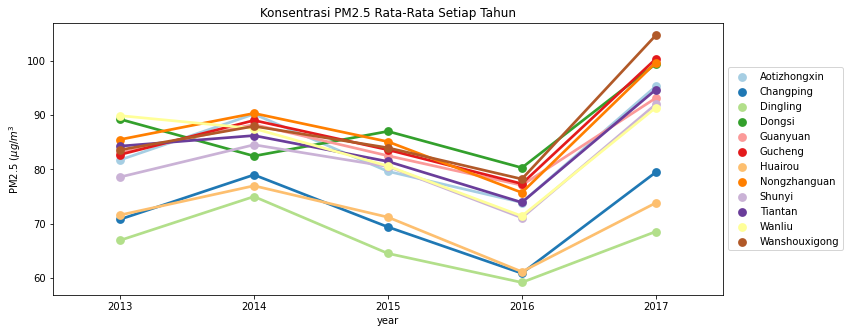

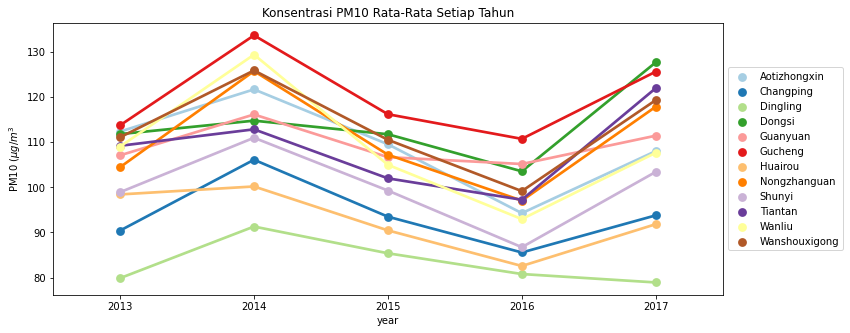

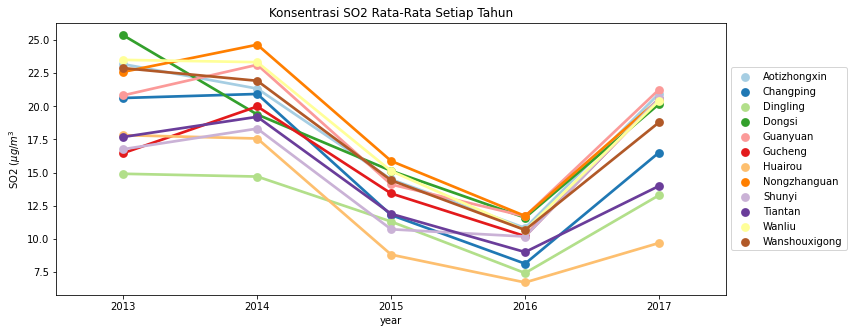

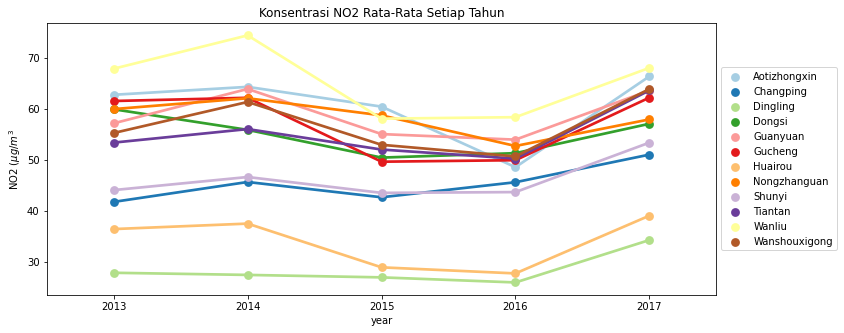

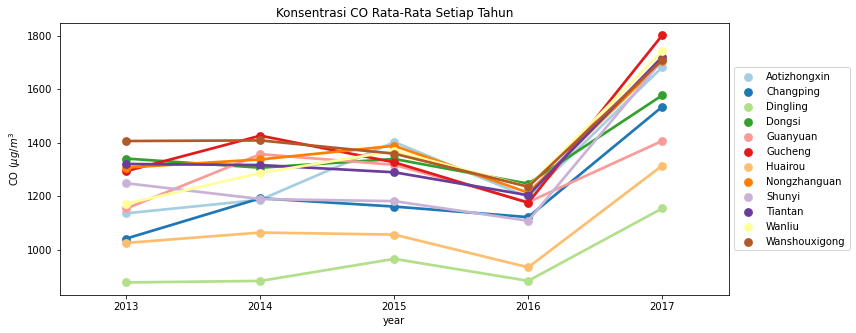

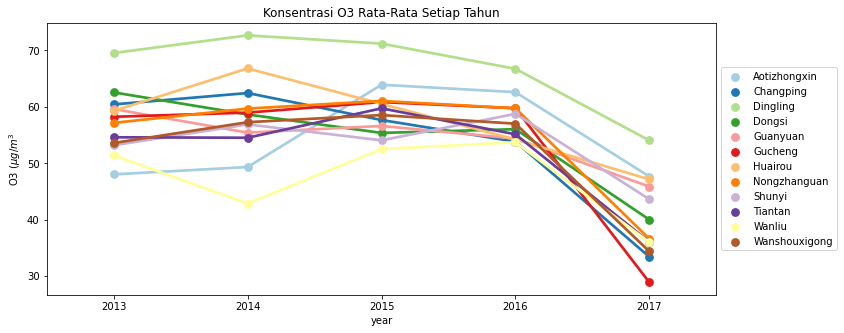

In [25]:
polutan = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in polutan:    
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=all_df, hue="station", ci=None, ax=ax, palette=sns.color_palette("Paired")[:13])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel(rf"{i} ($\mu g/m^{3}$", fontsize=10)
    plt.title(f"Konsentrasi {i} Rata-Rata Setiap Tahun")
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Berdasarkan visualisasi di atas, dapat kita lihat bahwa konsentrasi polutan PM2.5 dan CO dari tahun 2013 sampai 2017 cenderung meningkat untuk semua station. Berbeda halnya dengan SO2 dan O3 yang cenderung menurun setiap tahunnya. Untuk polutan PM10 dan NO mengalami tren yang berbeda untuk setiap stationnya, ada yang cenderung meningkat dan menurun.

### 2. Bagaimana tren konsentrasi polutan dalam setiap harinya untuk sepekan?

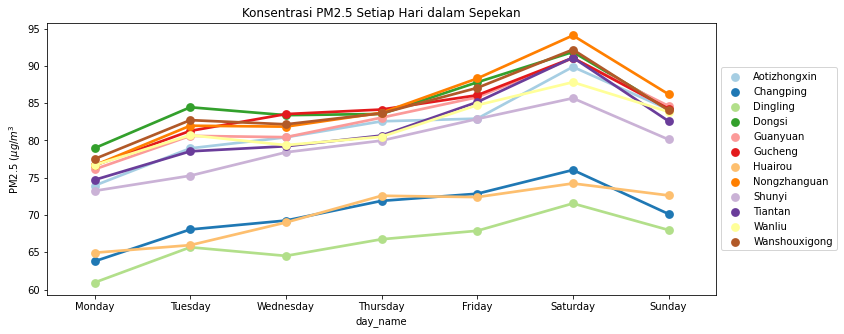

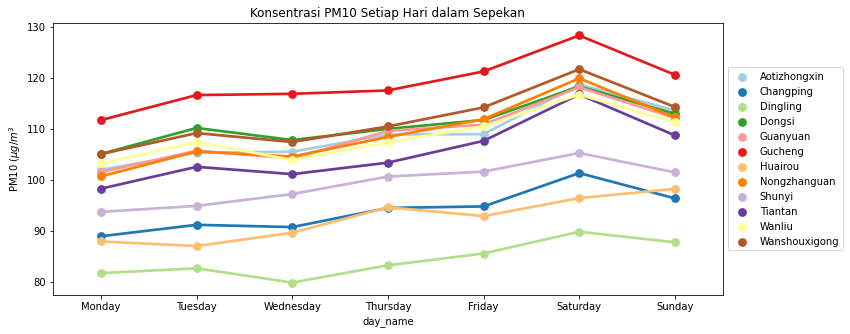

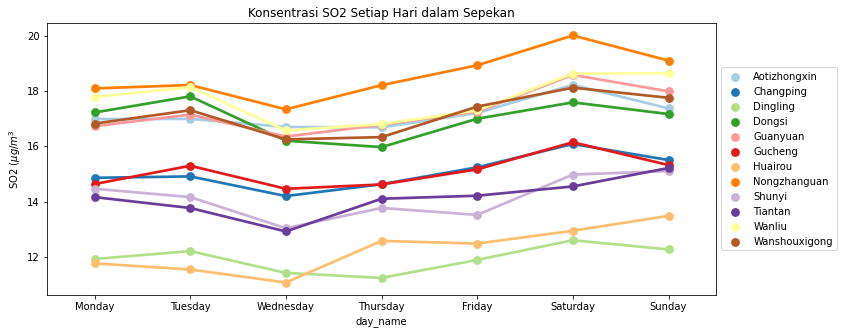

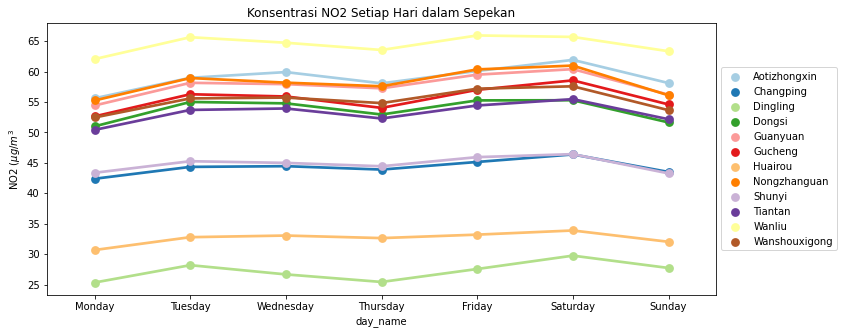

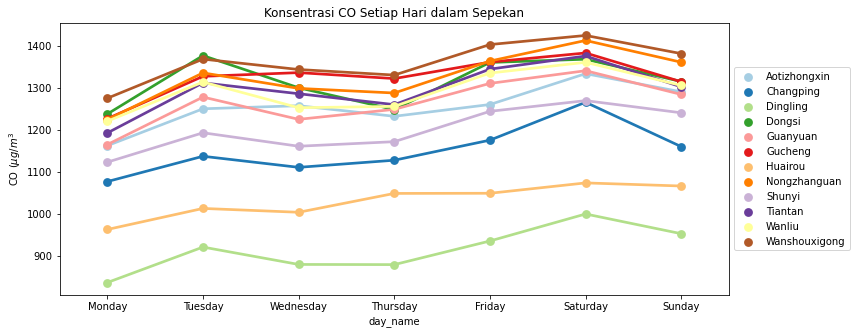

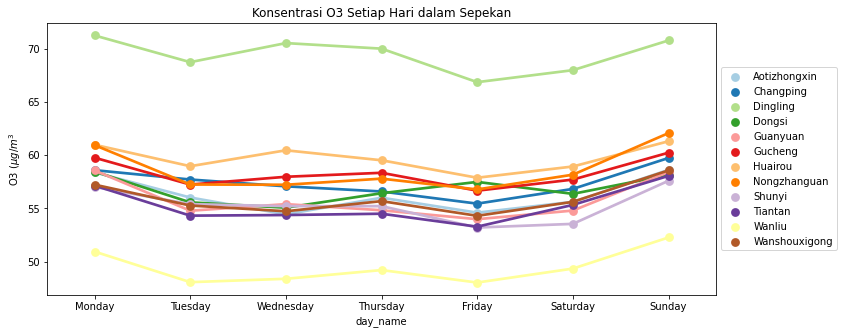

In [26]:
for i in polutan:    
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='day_name',
                  y=i,
                  data=all_df, hue="station",
                  ci=None,
                  ax=ax,
                  palette=sns.color_palette("Paired")[:13],
                  order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel(rf"{i} ($\mu g/m^{3}$", fontsize=10)
    plt.title(f"Konsentrasi {i} Setiap Hari dalam Sepekan")
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Berdasarkan visualisasi di atas, dapat dilihat bahwa tingkat polutan PM2.5 PM10, SO2, CO, dan NO2 mengalami peningkatan pada akhir pekan yaitu hari Jumat dan Sabtu. Kemudian mengalami penurunan mulai hari Minggu. Di sisi lain, konsentrasi O3 menampilkan tren yang fluktuatif namun cenderung menurun dari awal pekan hingga akhir pekan.

### 3. Bagaimana tren konsentrasi polutan dalam setiap jamnya untuk sehari?

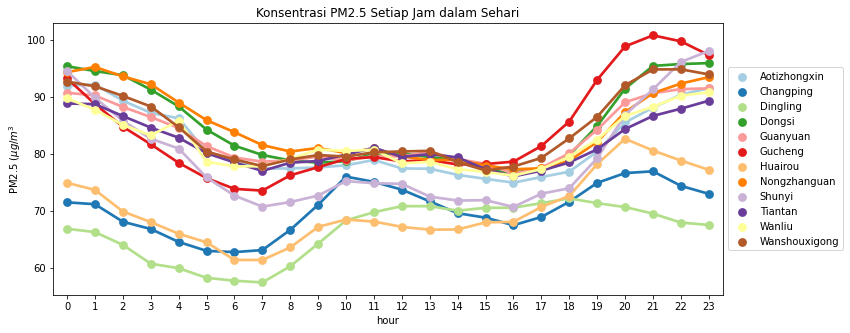

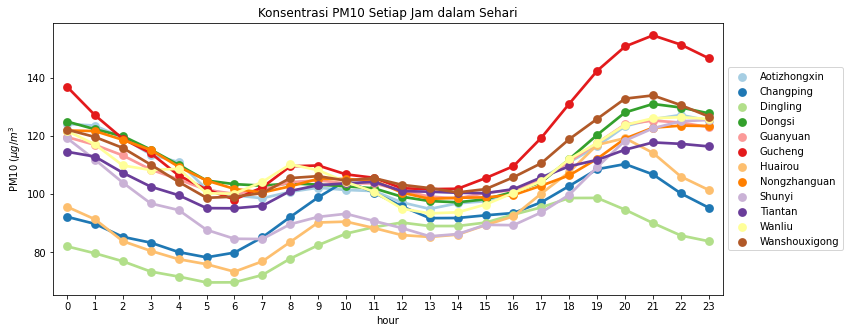

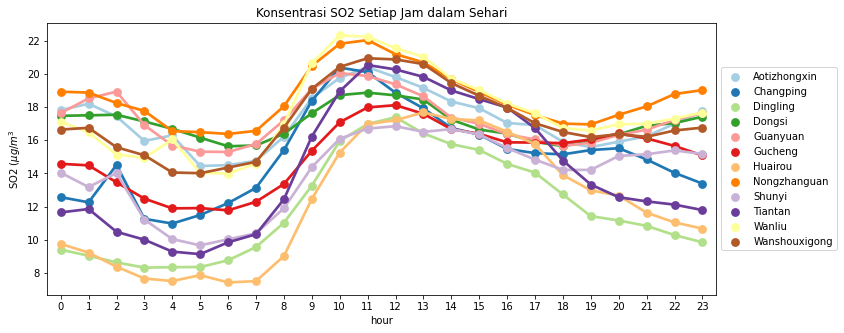

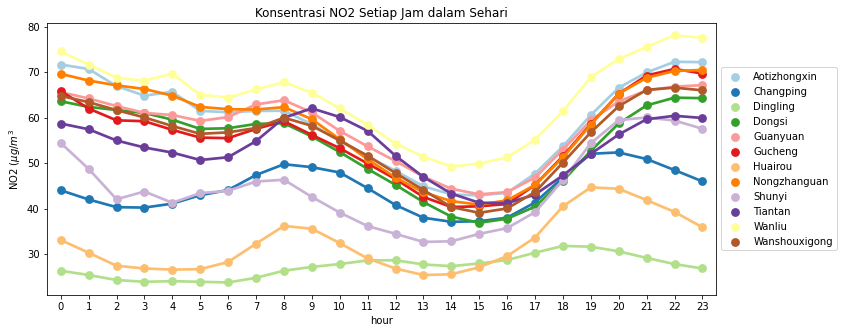

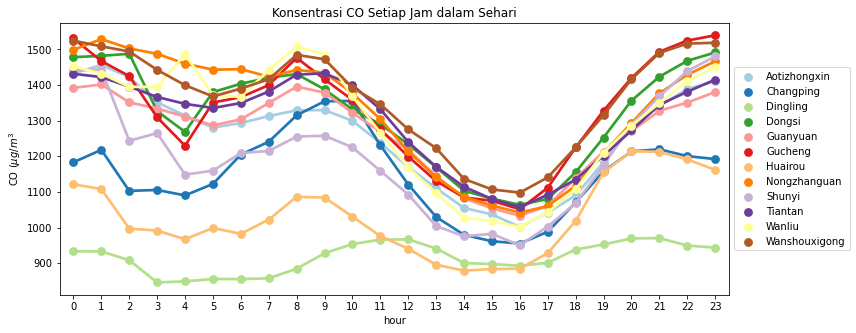

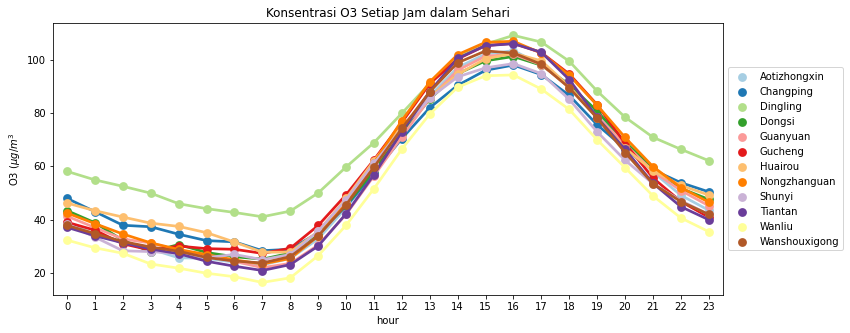

In [27]:
for i in polutan:    
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='hour',
                  y=i,
                  data=all_df, hue="station",
                  ci=None,
                  ax=ax,
                  palette=sns.color_palette("Paired")[:13],)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel(rf"{i} ($\mu g/m^{3}$", fontsize=10)
    plt.title(f"Konsentrasi {i} Setiap Jam dalam Sehari")
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Berdasarkan gambar di atas beberapa polutan memiliki tren yang unik.
Misalkan pada PM2.5 dan PM10 dapat dilihat bahwa terjadi peningkatan yang signifikan pada sekitar pukul 17 hingga mencapai puncaknya pada pukul 21.
Sedangkan untuk NO2 dan CO terjadi penurunan sekitar pukul 11 hingga 16, kemudian meningkat hingga mencapai puncaknya pukul 23.
Di sisi lain, O3 mengalami peningkatan mulai pukul 8 hingga mencapai puncaknya pada pukul 16, kemudian menurun sampai pukul 6.
Konsentrasi SO2 mengalami peningkatan sekitar pukul 8 hingga 11, kemudian turun sedikit demi sedikit hingga pukul 7.

### Bagaimana kualitas udara setiap station dalam tiga tahun terakhir?

Menentukan persentase kualitas udara dilakukan dengan menghitung rata-rata masing-masing kategori kualitas udara untuk setiap station dari data keseluruhan berdasarkan konsentrasi PM2.5

In [28]:
station_air_quality = {}
for stations in all_df.station.unique():
    air_quality_count = (all_df[all_df['station']==stations]
                         .air_quality
                         .value_counts())
    air_quality_sum = (all_df[all_df['station']==stations]
                       .air_quality
                       .value_counts()
                       .sum())
    percentage = air_quality_count / air_quality_sum * 100
    station_air_quality[stations] = percentage.reset_index().rename(columns={'air_quality': 'percentage', "index":"air_quality"})

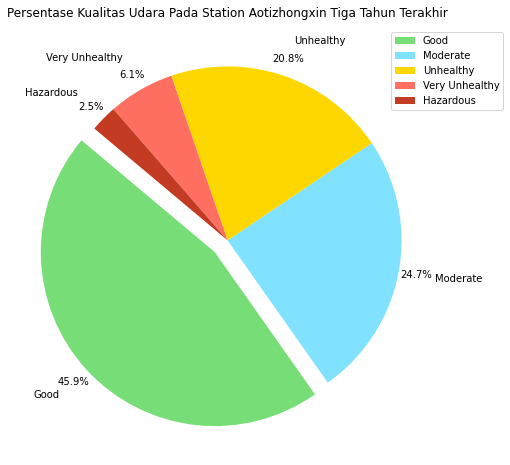

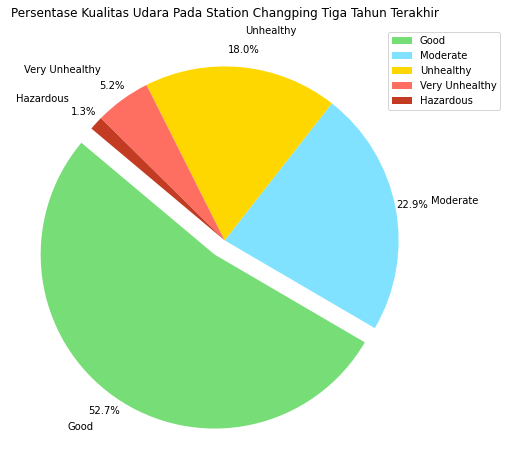

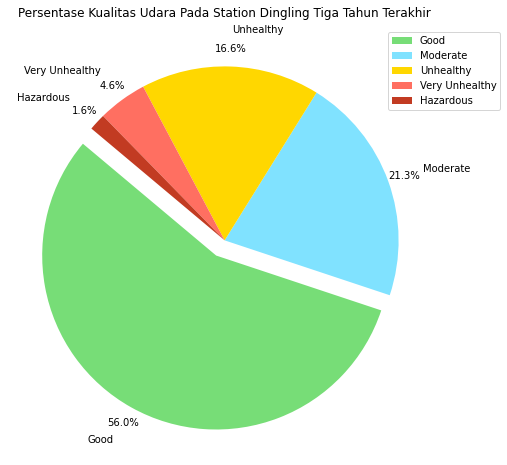

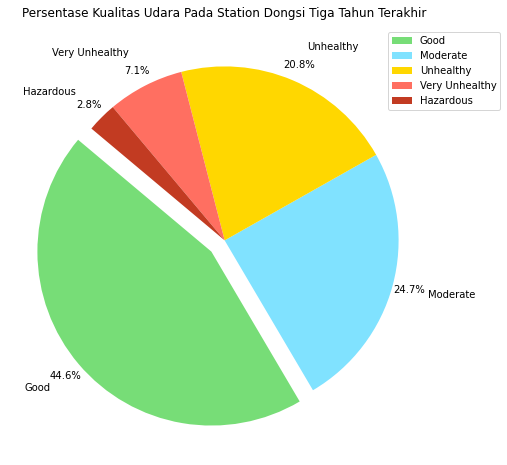

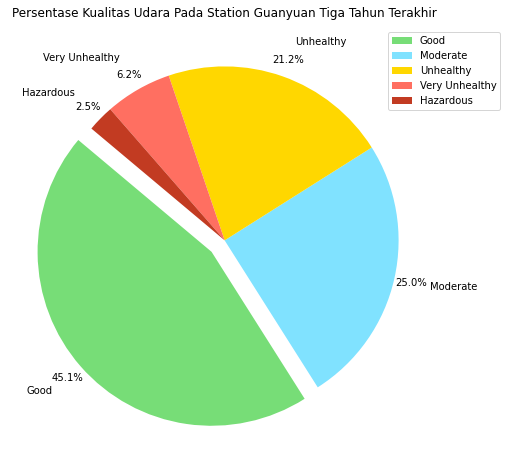

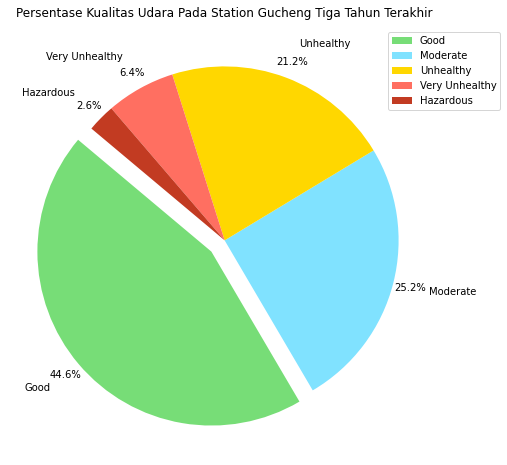

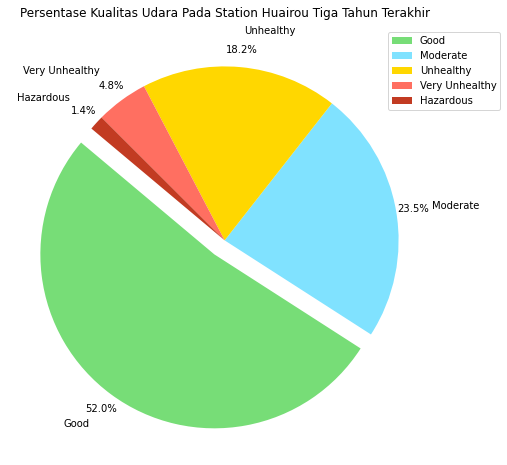

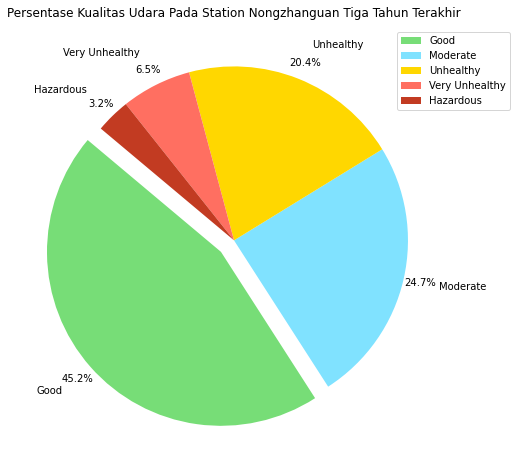

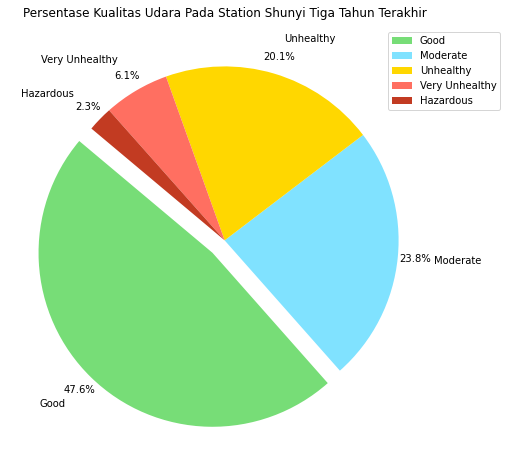

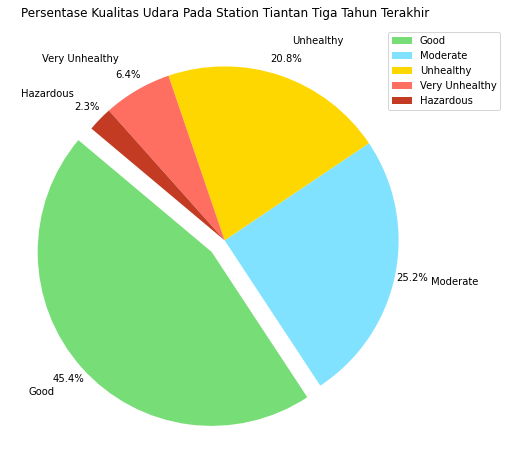

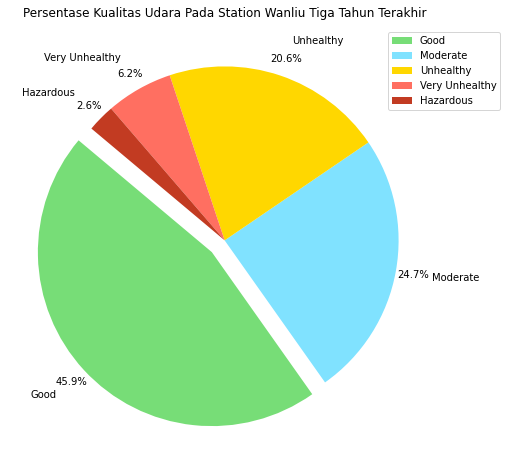

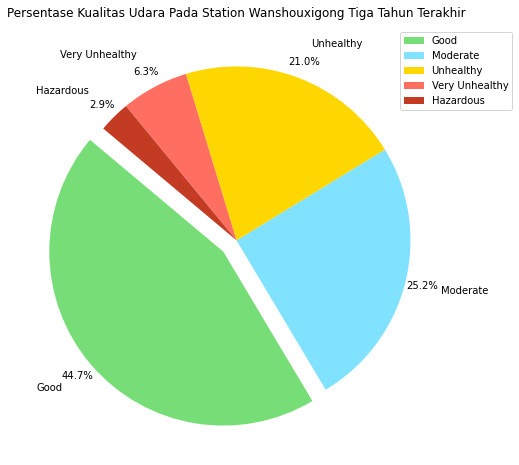

In [29]:
for stations in all_df.station.unique():
    plt.figure(figsize=(8, 8))
    custom_colors = ['#77DD77', '#80e2FF', '#FFD700', '#FF6F61', "#C23B22"]
    ax = plt.pie(station_air_quality[stations]["percentage"],
                 labels=station_air_quality[stations]["air_quality"],
                 autopct='%1.1f%%',
                 pctdistance=1.1,
                 labeldistance=1.21,
                 startangle=140,
                 explode=(station_air_quality[stations]["percentage"] == station_air_quality[stations]["percentage"].max())*0.1,
                colors=custom_colors)
    plt.title(f'Persentase Kualitas Udara Pada Station {stations} Tiga Tahun Terakhir')
    plt.legend(station_air_quality[stations]["air_quality"], bbox_to_anchor=(1,0.72), loc="lower right", 
                              bbox_transform=plt.gcf().transFigure)

Berdasarkan visualisasi di atas, semua station secara dominan dalam tiga tahun terakhir memiliki kualitas udara yang baik dalam hal konsentrasi kandungan PM2.5.

### 5. Station mana yang memiliki kualitas udara paling baik dalam tiga tahun terakhir?

In [47]:
extract_pct = [[pct for pct in station_air_quality[station]["percentage"]] for station in all_df.station.unique()]
air_quality_segmented = pd.DataFrame(np.array(extract_pct),
                                columns=all_df.air_quality.unique())
air_quality_segmented["station"] = all_df.station.unique()

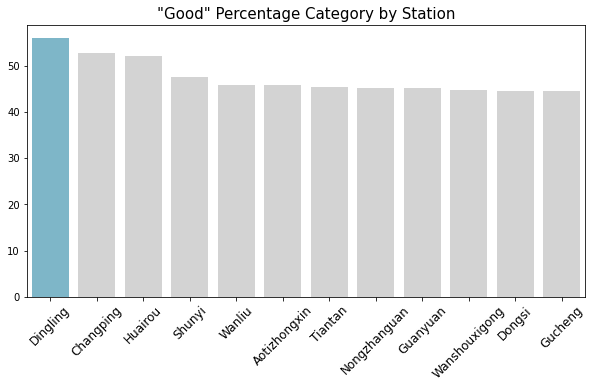

In [31]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))
sns.barplot(
    y="Good",
    x="station",
    data=air_quality_segmented.sort_values(by="Good", ascending=False),
    palette=colors_)
plt.title("\"Good\" Percentage Category by Station", loc="center", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

Berdasarkan visualisasi data di atas, station yang cenderung memiliki kualitas udara lebih berdasarkan kandungan PM2.5 baik dibandingkan station lain adalah Station Dingling. Hal ini dikarenakan station DIngling memiliki persentase kategori "Good" yang paling tinggi di bandingkan station lain.

### 6. Berapa konsentrasi polutan untuk setiap station dalam setahun terakhir?

In [32]:
polutan_2017_df = all_df[all_df["year"]==2017].groupby(by="station").agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
}).reset_index()
polutan_2017_df.head()

,station,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,95.325616,108.040329,20.958178,66.328603,1681.702763,47.651979
1,Changping,79.469373,93.792620,16.511439,50.979336,1534.022140,33.405166
2,Dingling,68.527367,78.922337,13.286243,34.228550,1154.437870,54.047337
3,Dongsi,99.471031,127.714071,20.171558,57.028593,1576.824680,39.998495
4,Guanyuan,93.163623,111.456621,21.264079,63.547945,1406.468798,45.869863


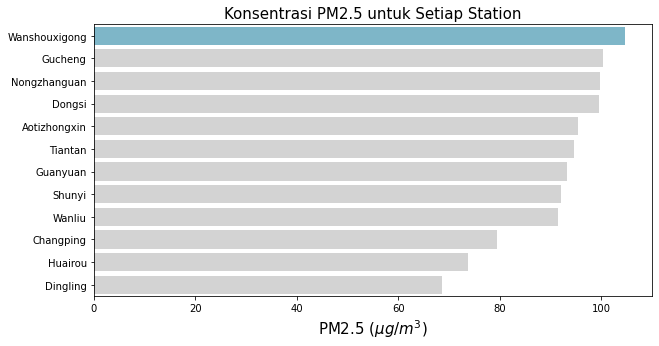

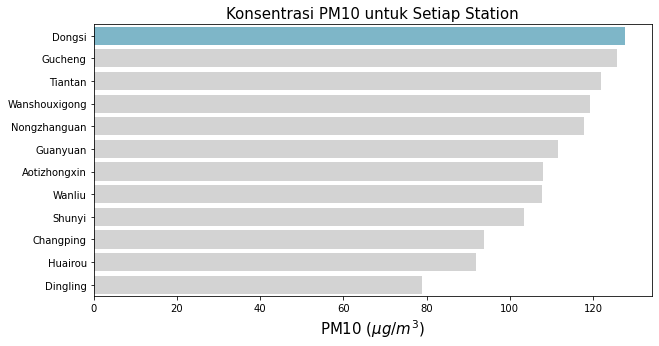

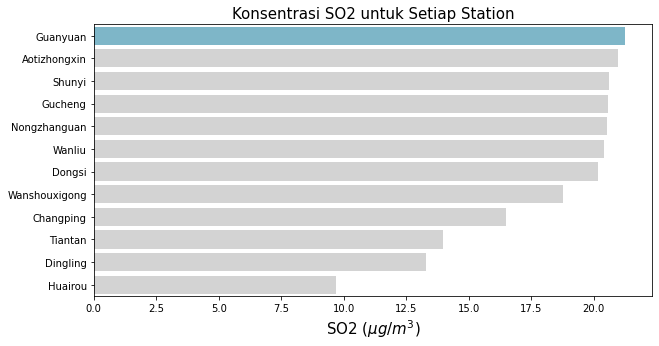

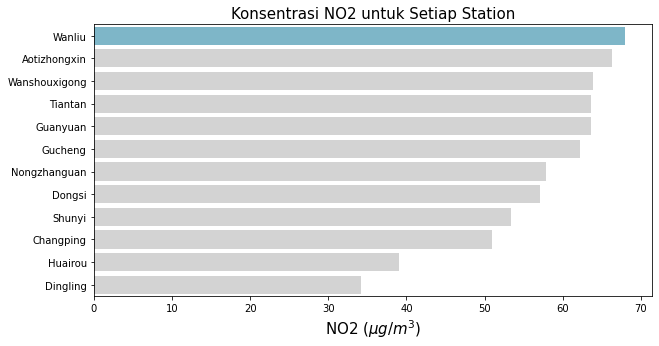

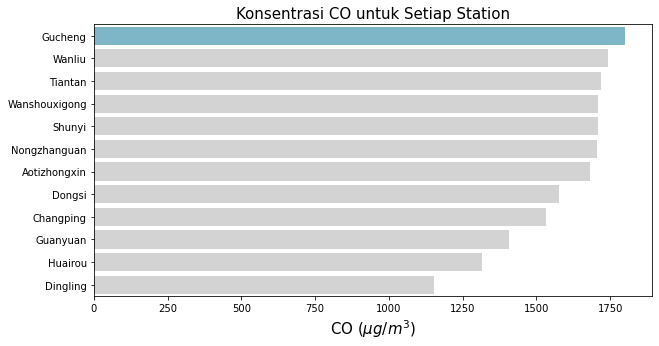

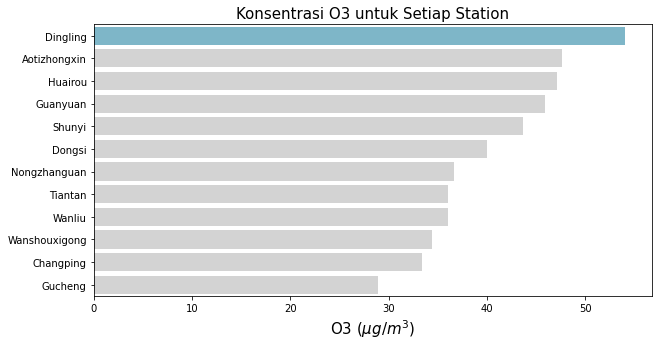

In [34]:
for i in polutan:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        y="station",
        x=i,
        data=polutan_2017_df.sort_values(by=i, ascending=False),
        palette=colors_ 
    )
    plt.title(f"Konsentrasi {i} untuk Setiap Station", loc="center", fontsize=15)
    plt.xlabel(rf"{i} ($\mu g/m^{3}$)",fontsize=15)
    plt.ylabel(None)
#     plt.tick_params(axis='x', labelsize=12)
    plt.show()

Konsentrasi setiap polutan untuk masing-masing station berbeda-beda, yaitu:
- Tingkat konsentrasi polutan PM2.5 tertinggi terdapat di Station Wanshouxigong
- Tingkat konsentrasi polutan PM10 tertinggi terdapat di Station Dongsi
- Tingkat konsentrasi polutan SO2 tertinggi terdapat di Station Guanyuan
- Tingkat konsentrasi polutan NO2 tertinggi terdapat di Station Wanliu
- Tingkat konsentrasi polutan CO tertinggi terdapat di Station Gucheng
- Tingkat konsentrasi polutan O3 tertinggi terdapat di Station Dingling

Namun ada sesuatu yang menarik yaitu station Dingling memiliki tingkat polutan paling rendah untuk semua jenis polutan kecuali polutan SO2 dan NO3. Hal yang sangat menarik adalah station Dingling justru memiliki tingkat konsentrasi O3 tertinggi dibandingkan station lain.

Hal ini menjadi sesuatu yang perlu ditelusuri lebih lanjut oleh pihak yang berwenang mengapa hal tersebut dapat terjadi pada station Dingling.

## Conclusion

- Tren konsentrasi polutan PM2.5 dan CO beberapa tahun terakhir cenderung meningkat. Namun, tren konsentrasi polutan SO2 dan O3 yang cenderung menurun setiap tahunnya. Sedangkan untuk polutan PM10 dan NO mengalami tren yang fluktuatif.
- Tren polutan PM2.5 PM10, SO2, CO, dan NO2 mengalami peningkatan pada akhir pekan dan mengalami penurunan mulai hari Minggu. Di sisi lain, konsentrasi O3 menampilkan tren yang fluktuatif namun cenderung menurun dari awal pekan hingga akhir pekan.
- Tren konsentrasi polutan PM2.5 dan PM10 mengalami peningkatan pada pukul 17 hingga pukul 21. Sedangkan untuk NO2 dan CO terjadi penurunan sekitar pukul 11 hingga 16, kemudian meningkat hingga pukul 23. Konsentrasai polutan O3 mengalami peningkatan mulai pukul 8 hingga pukul 16, kemudian menurun sampai pukul 6. Konsentrasi SO2 mengalami peningkatan pukul 8 hingga 11, kemudian turun hingga pukul 7.
- Kualitas udara tiga tahun terakhir di setiap station memiliki kualitas udara yang baik dalam hal konsentrasi kandungan PM2.5.
- Station Dingling cenderung memiliki kualitas udara lebih berdasarkan kandungan PM2.5 baik dibandingkan station lain.
- Konsentrasi setiap polutan untuk masing-masing station berbeda-beda.